In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

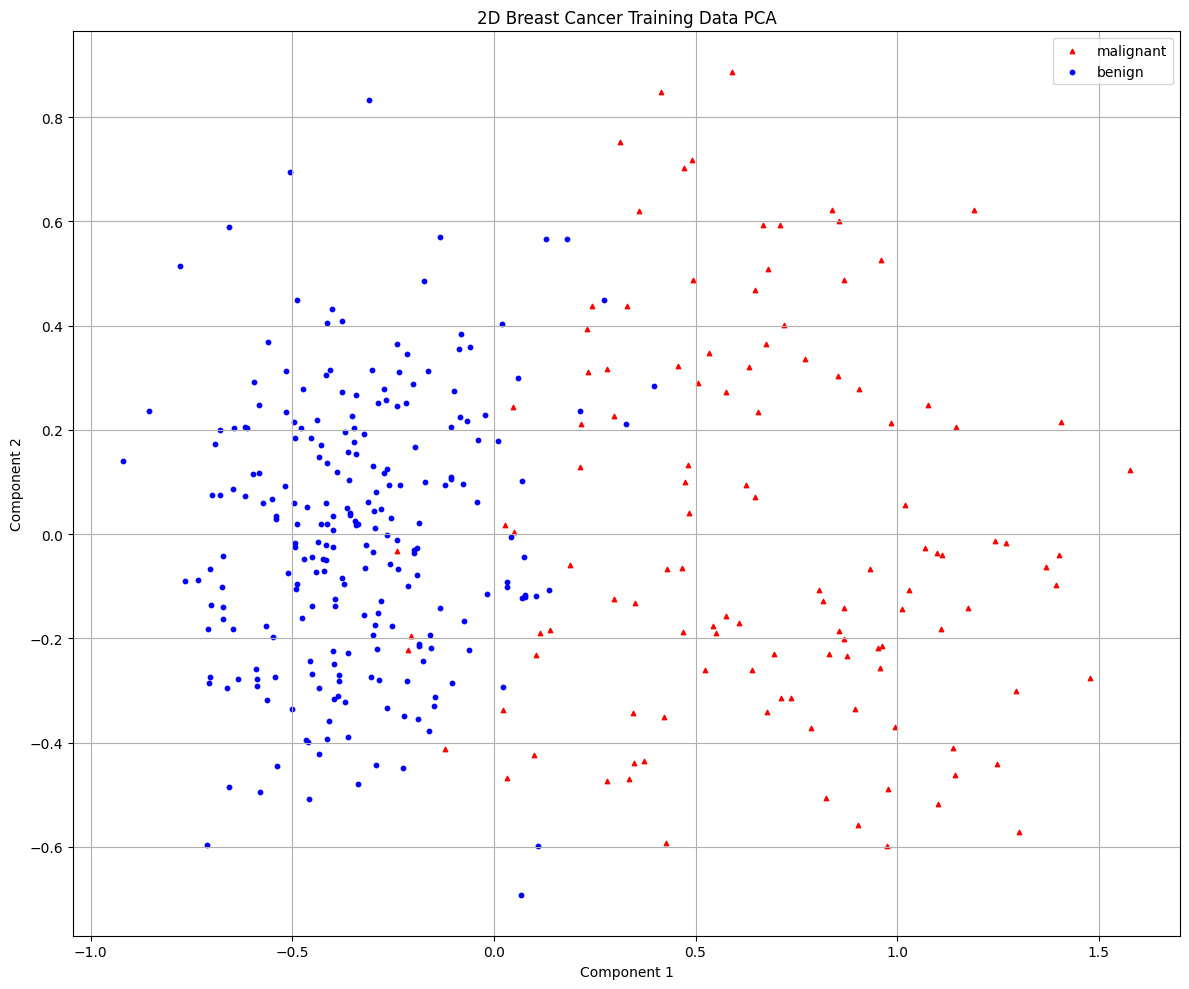

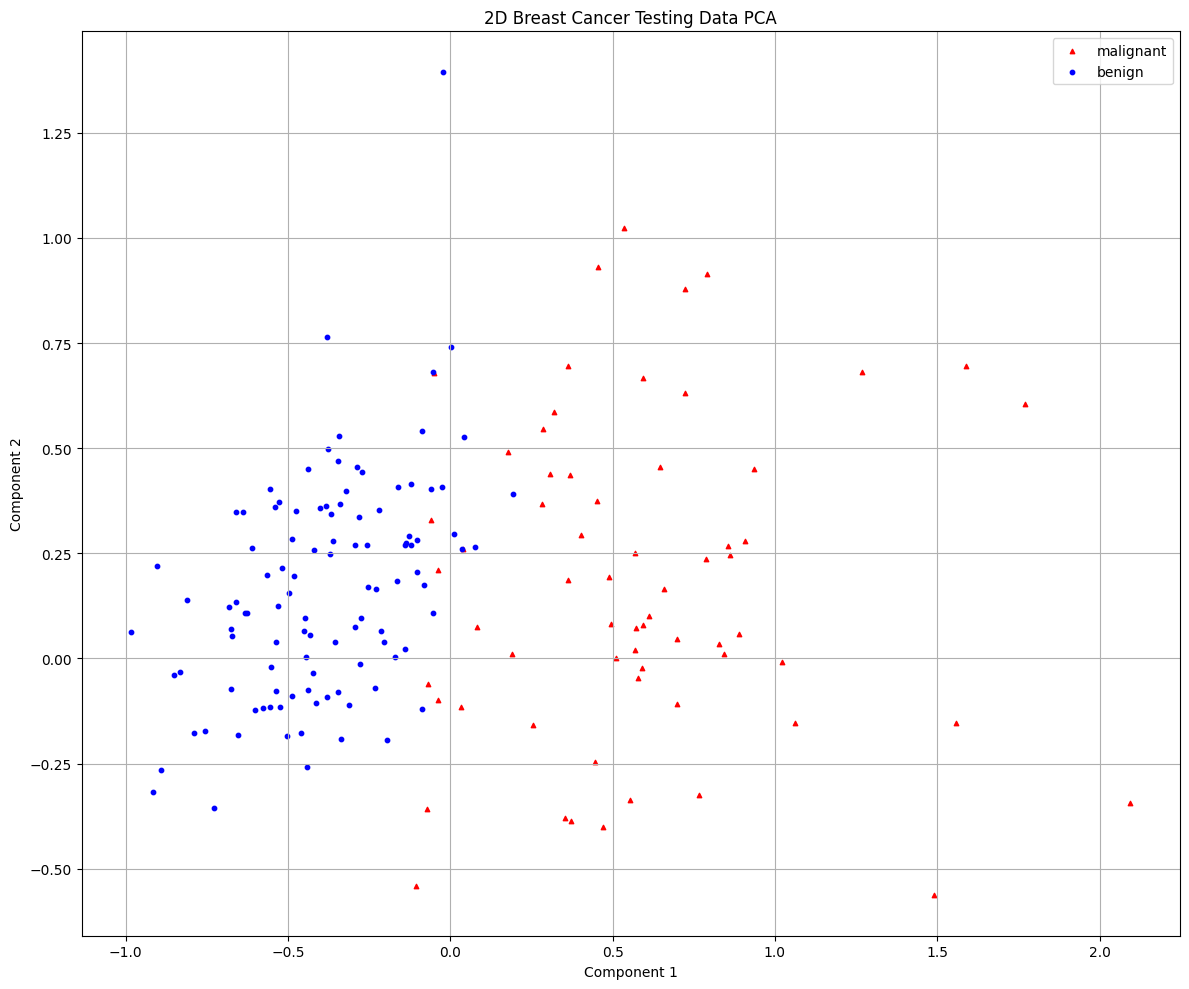

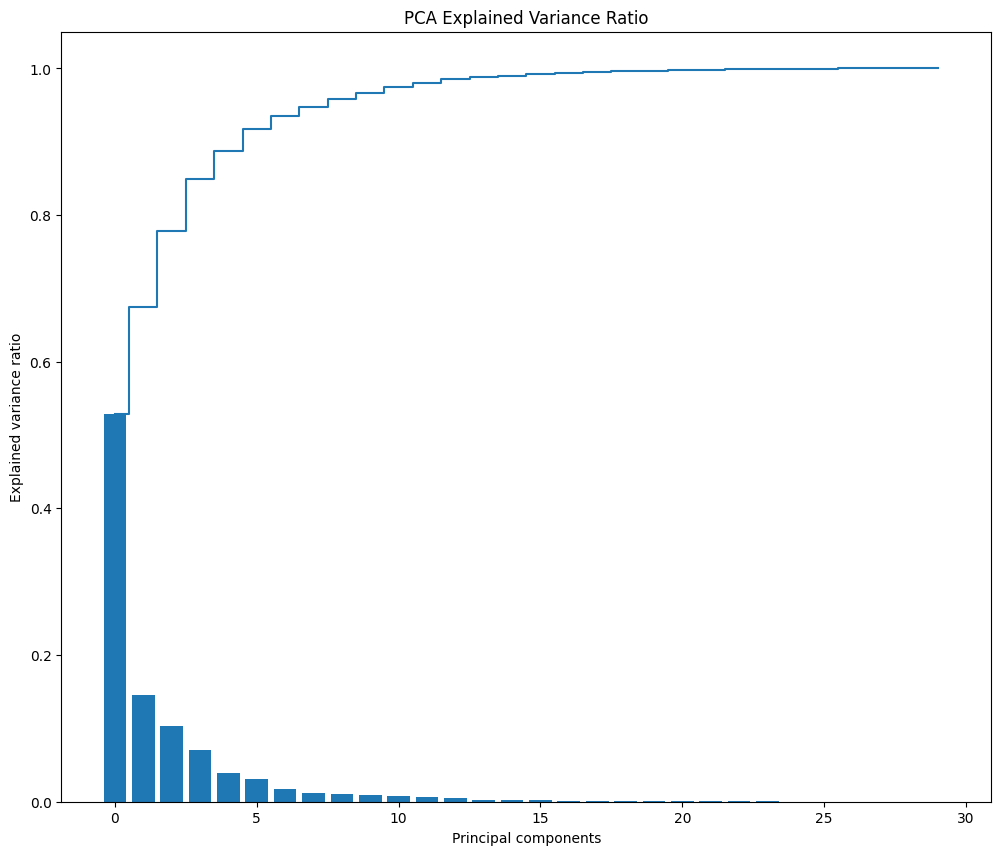

In [2]:
outlier_params = {'n_estimators': 1000, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'if', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {})

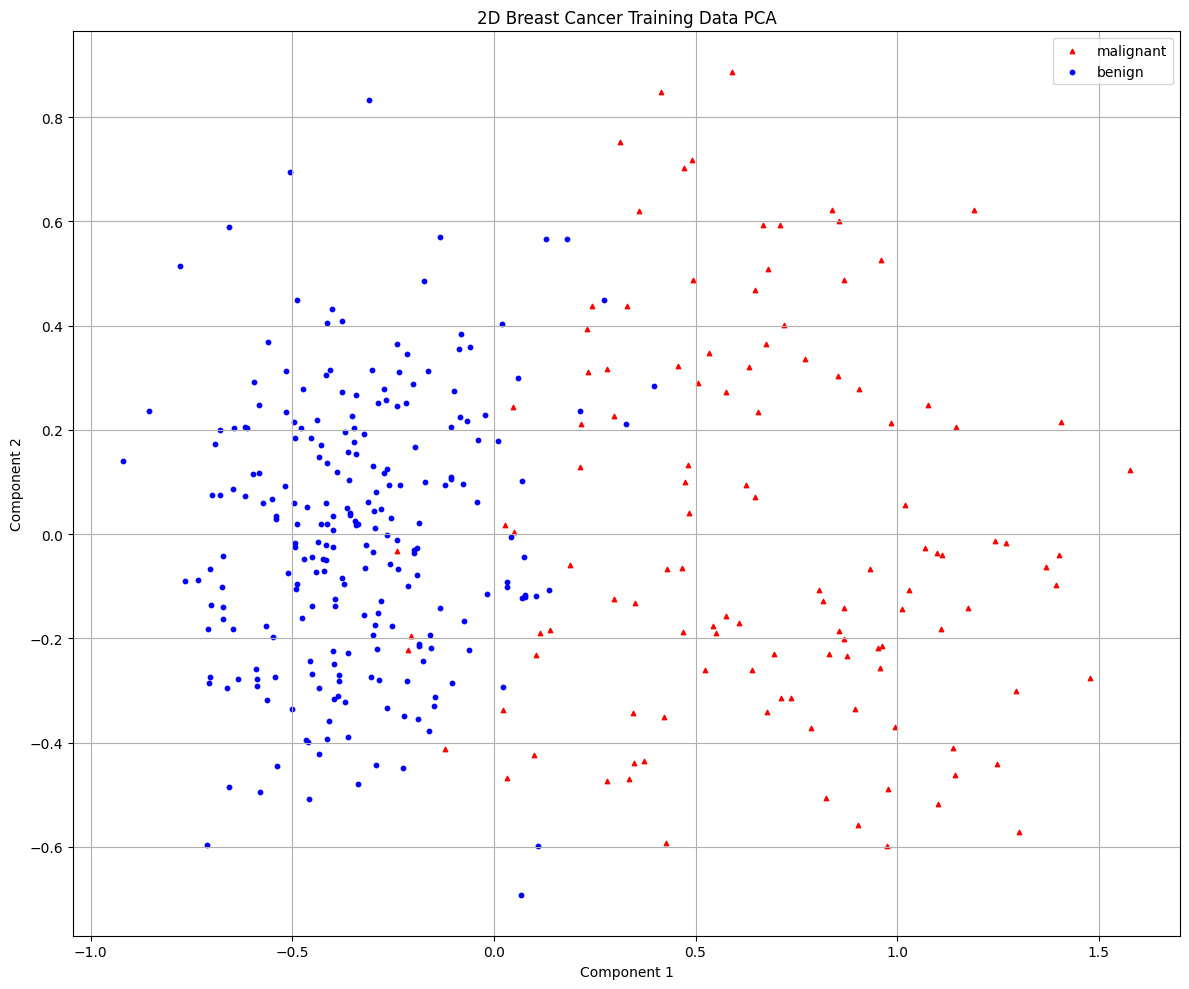

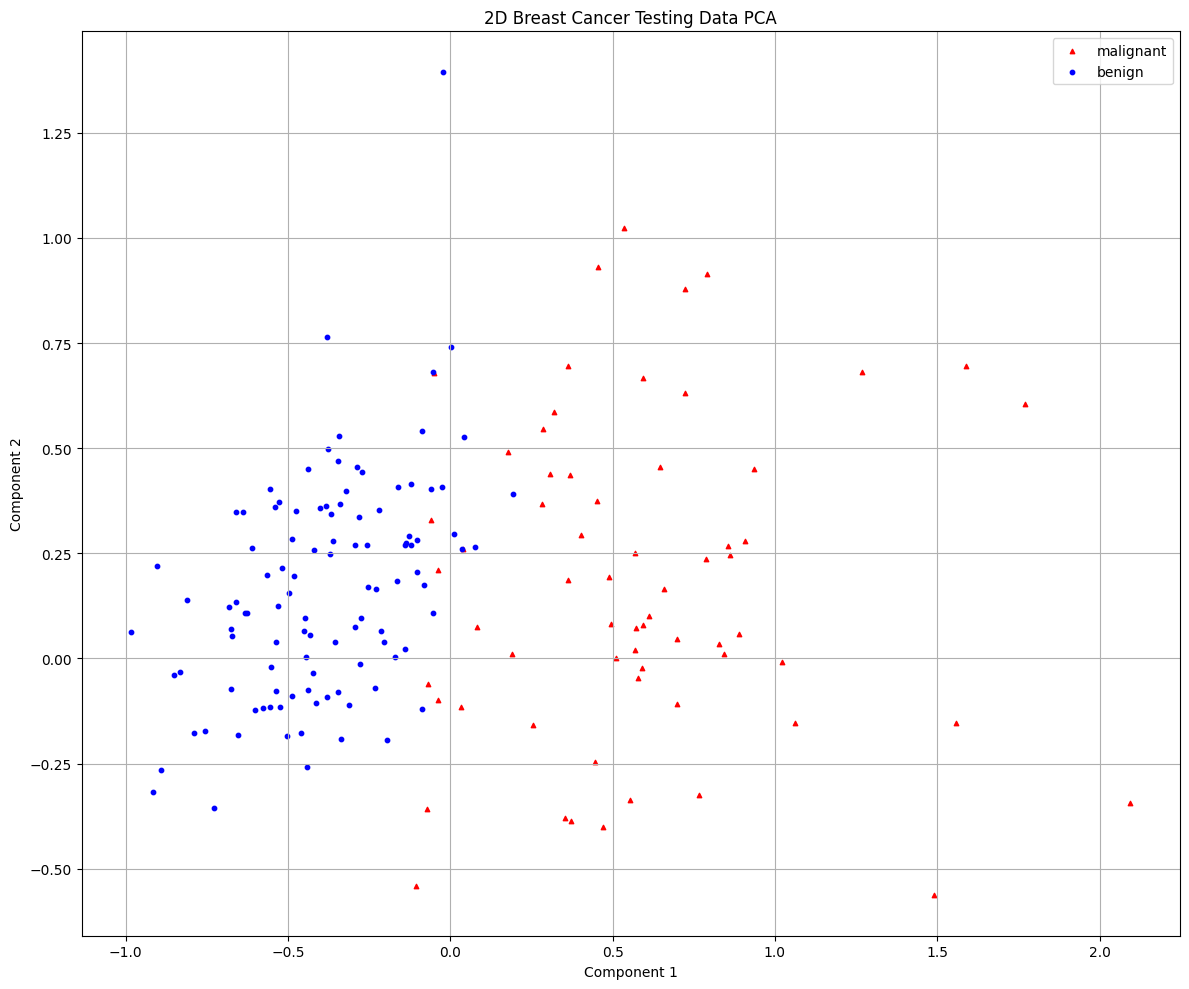

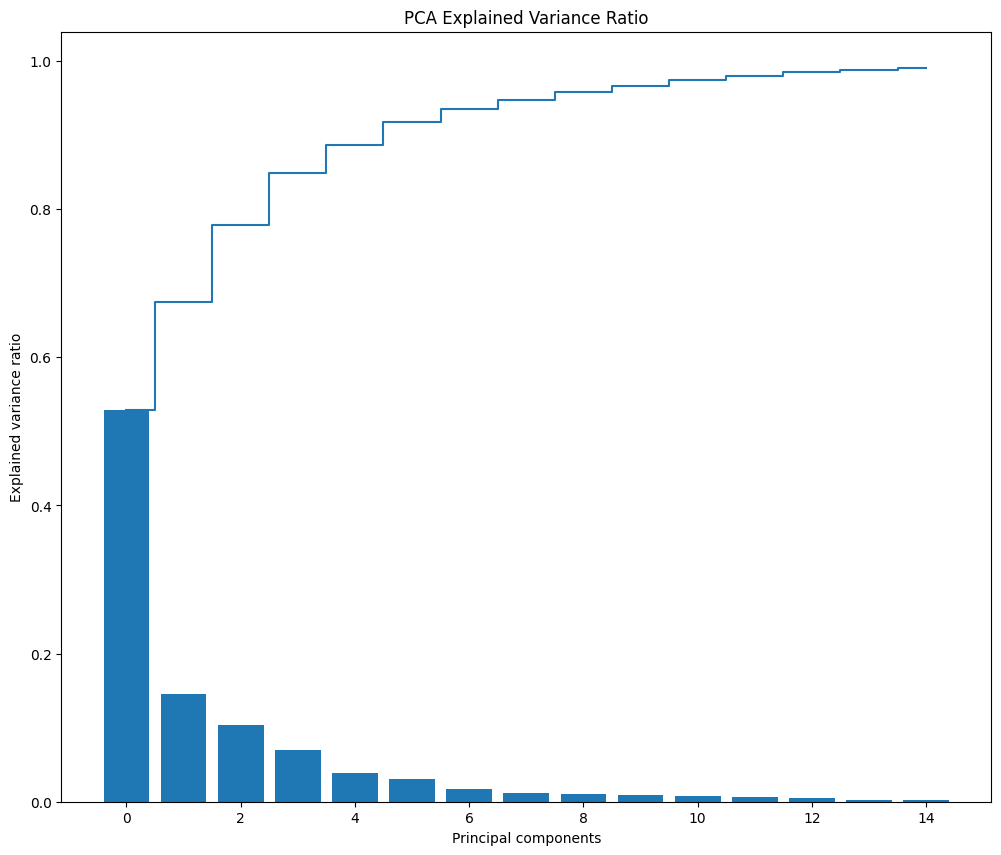

[I 2025-04-27 11:16:10,684] A new study created in memory with name: no-name-435bd356-6056-4aac-ba1c-c6ac0768ff35
[I 2025-04-27 11:16:10,699] Trial 0 finished with value: 0.9519517102615694 and parameters: {'C': 0.17024183640673884, 'kernel': 'linear', 'max_iter': 1781}. Best is trial 0 with value: 0.9519517102615694.
[I 2025-04-27 11:16:10,730] Trial 1 finished with value: 0.6638631790744467 and parameters: {'C': 0.06292090335704427, 'kernel': 'rbf', 'gamma': 0.00013803768324056182, 'max_iter': 737}. Best is trial 0 with value: 0.9519517102615694.
[I 2025-04-27 11:16:10,745] Trial 2 finished with value: 0.9773440643863178 and parameters: {'C': 3.298951501059951, 'kernel': 'sigmoid', 'gamma': 0.13795208727214628, 'max_iter': 1260}. Best is trial 2 with value: 0.9773440643863178.
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=4514).  Consider pre-processing your data with StandardScaler or Mi

Best trial:
Accuracy: 0.9830181086519115
Best hyperparameters:  {'C': 1.104276840357108, 'kernel': 'sigmoid', 'gamma': 0.8948135554953159, 'max_iter': 9974}


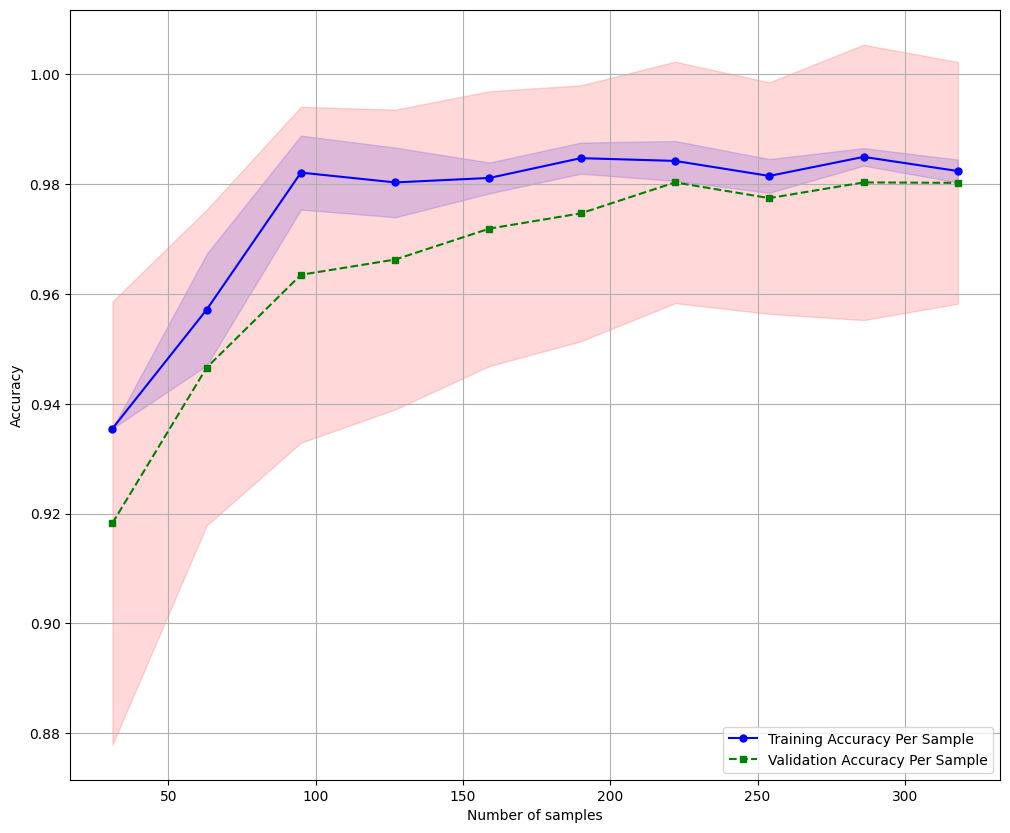

Confusion Matrix
[[ 52  12]
 [  0 107]]
Accuracy: 0.9298, Precision: 0.8992, Recall: 1.0000, F1: 0.9469, AUC: 0.9893


In [3]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {'n_components': 15})
helper.train_and_evaluate_model('svc', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)